# Photo Palette

## Creates a list of colors and their proportions from a picture

The initial idea for this is to use colors and their proportions for fashion.

A user will be able to take a photo, for example, a picture of their face, identify the proportions of colors (background, skin, hair, eyes, etc.) and use this info. when planning out the clothing colors they will use as primary, secondary, highlights, etc.

In [28]:
import numpy as np  # image file format will be arrays in numpy
import cv2 as cv  # images will be taken using OpenCV, specifically, opencv-python
import matplotlib.pyplot as plt  # shows images in the notebook and shows charts
from sklearn.cluster import KMeans

### Taking and accessing a photo

#### This next code block will open the computer's default camera and start showing images to the user as a video feed.

Current interactions are pressing "**s**" to snap a photo and "**q**" to quit.

Snapping a photo will cause it to be saved in the user's computer. Only one image is saved at a time, and it is accessible in **data/image-capture/**.

Based on sources [here](https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv#34588758) and [here](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python).

In [82]:
vid_feed = cv.VideoCapture(0) #  goes with the first camera it can find in this device

#  creates a new window titled by the input string
cv.namedWindow('test')
print('video feed launching')
while True:
    success_bool, frame = vid_feed.read()
    
    if (not success_bool):
        print('error reading video feed')
        break        
    
    #cropping frame
    frame = frame[150:420, 280:520] #  [ V , > ]
    
    cv.imshow('test', frame)
    # cv.waitKey(1) waits 1ms for a key press,
    # returning that pressed key as a string
    k = cv.waitKey(1) 

    # press 's' to save the image into the following directory with the following name
    if k == ord("s"):
        cv.imwrite('data/capturecopy3.png', frame) # note: if a folder does not already exist, it will miss
        print('image saved')
    elif k == ord("q"):
        print('quit')
        break
    else:
        pass

#closes all windows opened by cv
cv.destroyAllWindows()    
    

video feed launching
quit


#### Reading the image from its directory.

In [29]:


image = cv.imread('data/capturecopy2.png')


#### To make a window pop up with this image, open cv is used.

In [3]:

cv.imshow('Example - Show image in window',image)
 
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image

For reading here in the notebook, I will use matplot lib. Note that open cv saves files in BGR format, while matplotlib's imshow() uses in RGB format. Examples [here](https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/).

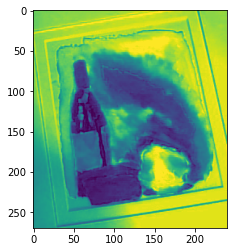

In [4]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,0])  # red

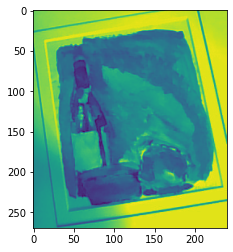

In [5]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,1])  # green

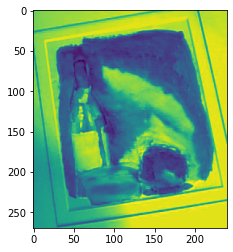

In [6]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,2])  # blue

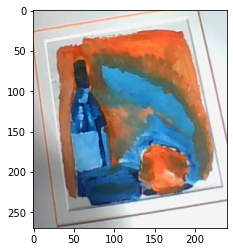

In [7]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))) 

### Finding the most common colors in this image.

At first, I had hoped for a simple histogram with different color names (red, orange, yellow, etc.).

From the perspective of RGB space, each pixel currently exists as an array of 3 color intensities: Red, Green, and Blue.
![Image of RGB](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/RGB_Cube_Show_lowgamma_cutout_b.png/320px-RGB_Cube_Show_lowgamma_cutout_b.png)
However, this data is not automatically grouped. In order to find tones, clustering analysis will be done in the RGB space, and colors will be shown based on the cluster's descriptive features, without names. Some methods of distance-determining and clustering can be explored until something that fits well is found.
This approach is shown [here](https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/).

Then, I learned that OpenCV can also convert images to HLS. From the perspective of HLS space, each pixel currently exists as an array of 3 attributes: Hue, Lightness, and Saturation.

![Image of HSL, a close cousin of HLS](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/HSL_color_solid_cylinder_saturation_gray.png/320px-HSL_color_solid_cylinder_saturation_gray.png)


HLS space seems fairly accessible. My guess is that this space can be made into a 1-dimensional hue series by selecting the hue value for each pixel. With only 1 dimension, grouping may be easier.

In [8]:
# Converting from BGR to HLS_FULL
# HLS_FULL has 360 integers in its Hue value
image_HLS = cv.cvtColor(image, cv.COLOR_BGR2HLS_FULL)

image_HLS[28, 29:35, :]

array([[127, 217,   7],
       [127, 218,   7],
       [117, 219,  14],
       [120, 219,  21],
       [120, 221,  22],
       [120, 220,  22]], dtype=uint8)

In [9]:
image_HLS[28:34, 29, :]

array([[127, 217,   7],
       [127, 217,   7],
       [127, 219,   7],
       [127, 220,   7],
       [ 21, 218,  14],
       [ 21, 215,  13]], dtype=uint8)

These arrays appear to have the following structure:

\[ Horizontal coordinate, Vertical coordinate, \[Hue, Lightness, Saturation\] \] 

In [78]:
# selecting all hues available
# max location values are [270, 240, :]

image_hue_np = image_HLS[:, :, 0]
image_hue_np = image_hue_np.flatten()
image_hue_list_unsorted = list(image_hue_np)
image_hue_np.sort()
image_hue_list = list(image_hue_np)


In [79]:
image_hue_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [80]:
# how many times does the hue 3 occur?
image_hue_list.count(3)

127

In [81]:
# how many unique hues are there in this pic?
unique_hues = np.unique(np.array(image_hue_list))

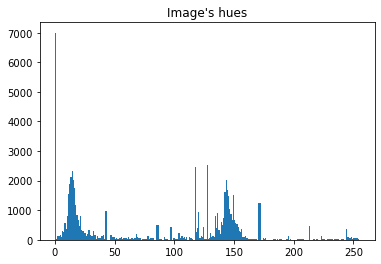

In [82]:
plt.title("Image's hues")
plt.hist(image_hue_list, bins = unique_hues)
plt.show()

The following 1D chart was made based on code [here](https://stackoverflow.com/questions/23546552/1d-plot-matplotlib)

In [83]:
image.shape

(270, 240, 3)

In [84]:
np.array(image_HLS).shape

(270, 240, 3)

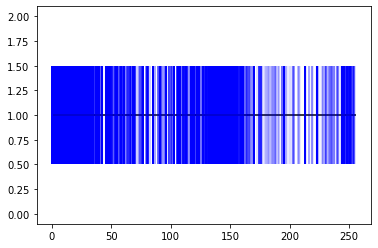

In [85]:
plt.figure()
a = image_hue_list
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = ['b']  # Requires RGB color format
plt.eventplot(a, orientation='horizontal', colors=point_colors, alpha = .03)
plt.axis('on')
plt.show()

Now, I will make the bars show the colors they represent. I'm hoping for an effect similar to a spectrum.

The pixel color data currently looks like the following, with each pixel getting an array of [R, G, B] values that describe its color.

In [52]:
(cv.cvtColor(image, cv.COLOR_BGR2RGB))[0:2,0:3,:]

array([[[192, 198, 197],
        [193, 199, 198],
        [193, 199, 198]],

       [[194, 200, 199],
        [194, 200, 199],
        [194, 200, 199]]], dtype=uint8)

In [53]:
(cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,:].shape

(270, 240, 3)

In [86]:
pixel_colors_RGB =  (cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,:]
RGB_colors = pixel_colors_RGB.reshape(64800, 3)
RGB_colors

array([[192, 198, 197],
       [193, 199, 198],
       [193, 199, 198],
       ...,
       [244, 244, 244],
       [244, 244, 244],
       [244, 244, 244]], dtype=uint8)

Matplotlib accepts RGB values in a particular format only:
"RGB or RGBA (red, green, blue, alpha) tuple of float values in a closed interval [0, 1]."

This conversion can be done rather smoothly via list comprehensions.

In [87]:
image_RGB_tuples = [tuple(x / 255) for x in RGB_colors]  # takes each list of RGB values, divides by 255
print('This list has a length of', len(image_RGB_tuples))
print('This list has the type', type(image_RGB_tuples))
image_RGB_tuples[0]

This list has a length of 64800
This list has the type <class 'list'>


(0.7529411764705882, 0.7764705882352941, 0.7725490196078432)

In [88]:
print('This list has a length of', len(image_hue_list_unsorted))  # this must be the same length
print('This list has the type', type(image_hue_list_unsorted))
image_hue_list_unsorted[0]

This list has a length of 64800
This list has the type <class 'list'>


120

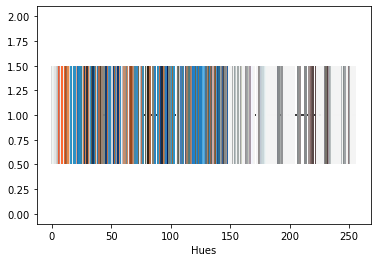

In [96]:
plt.figure()
hues = [image_hue_list_unsorted]
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = [image_RGB_tuples]  # Requires RGB color format
plt.eventplot(hues, orientation='horizontal', colors = point_colors, alpha = 1)
plt.axis('on')
plt.xlabel('Hues')
plt.show()

# note: hues and point_colors need to be a list contained within another list
# learned through guess & check.

Due to this showing rings of blue and orange/brown, I suspect something went wrong. Perhaps the **RGB_colors** varible was scrambled when it was reshaped from **pixel_colors_rgb**?

Instead, let's try taking going from this hue list to RGB.

In [104]:

image_rgb_tuples = [ [x, 100, 100] for x in image_hue_list_unsorted ] # HSV features filler S and V
# cv.cvtColor(, cv.COLOR_HSV2RGB )
image_rgb_tuples

[[120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [120, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [119, 100, 100],
 [119, 100, 100],
 [117, 100, 100],
 [119, 100, 100],
 [119, 100, 100],
 [119, 100, 100],
 [119, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100, 100],
 [117, 100

Trying again.

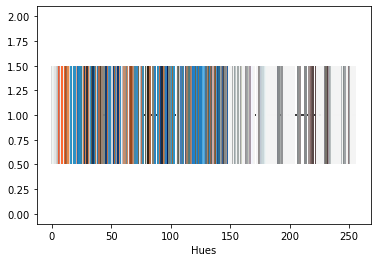

In [98]:
plt.figure()
hues = [image_hue_list_unsorted]
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = [image_RGB_tuples]  # Requires RGB color format
plt.eventplot(hues, orientation='horizontal', colors = point_colors, alpha = 1)
plt.axis('on')
plt.xlabel('Hues')
plt.show()

# note: hues and point_colors need to be a list contained within another list
# learned through guess & check.

Trying with **image_hue_list**.

In [99]:
image_hue_tuple_recreation = [ tuple([x, 100, 100]) for x in image_hue_list ] # HSV features filler S and V
image_rgb_tuples

[(0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100, 100),
 (0, 100

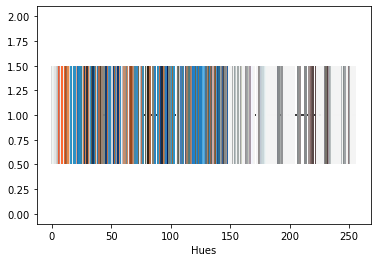

In [100]:
plt.figure()
hues = [image_hue_list]
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = [image_RGB_tuples]  # Requires RGB color format
plt.eventplot(hues, orientation='horizontal', colors = point_colors, alpha = 1)
plt.axis('on')
plt.xlabel('Hues')
plt.show()

# note: hues and point_colors need to be a list contained within another list
# learned through guess & check.

Exploring image display.

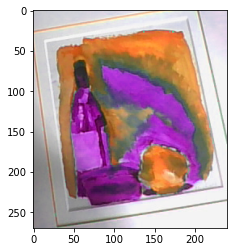

In [13]:
plt.imshow(cv.cvtColor(image_HLS, cv.COLOR_HLS2RGB))

There appears to be some information loss.

**Clustering in BGR and converting to RGB** will involve less conversion, so should retain more information quality.

Three phases are planned as follows:

1. Format the image data to be readable by sklearn. Visual location of pixels does not matter, only RGB coordinates need to be retained.

2. Make a working model.

3. Output color swatches in rectangles or circles, ideally of varying sizes based on the number of points in each group.

4. Find a grouping method that gives great results.

**1**

Image can be loaded here.

In [35]:
image = cv.imread('data/capturecopy2.png')

Converting image to RGB color space.

In [37]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [38]:
print(image.shape)
image

(270, 240, 3)


array([[[192, 198, 197],
        [193, 199, 198],
        [193, 199, 198],
        ...,
        [214, 225, 229],
        [214, 225, 229],
        [214, 225, 229]],

       [[194, 200, 199],
        [194, 200, 199],
        [194, 200, 199],
        ...,
        [215, 226, 230],
        [214, 225, 229],
        [214, 225, 229]],

       [[198, 200, 200],
        [197, 199, 199],
        [197, 199, 199],
        ...,
        [214, 225, 230],
        [212, 226, 229],
        [211, 225, 228]],

       ...,

       [[133, 133, 137],
        [133, 132, 139],
        [132, 134, 140],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[133, 133, 135],
        [132, 132, 134],
        [131, 133, 135],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[133, 133, 135],
        [133, 133, 135],
        [131, 133, 135],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]]

Reshaping image to remove the pixel's coordinates within the image. This should leave RGB distances as the only kind of distances considered.

In [41]:
image = image.reshape(270*240, 3)
image.shape

(64800, 3)

In [43]:
image[0, :]

array([192, 198, 197], dtype=uint8)

**2**

Fitting a KMeans model to produce unsupervised clusters. I assume this will always need to be unsupervised learning, but the model and hyperparameters used later will be down to personal preference.

In [46]:
kmeans_model = KMeans(n_clusters = 6, random_state = 0)
kmeans_model.fit(X = image)
kmeans_model.predict(image)

array([0, 0, 0, ..., 0, 0, 0])

**3**

Plotting a [3D representation](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) of the RGB values in this image's pixels.

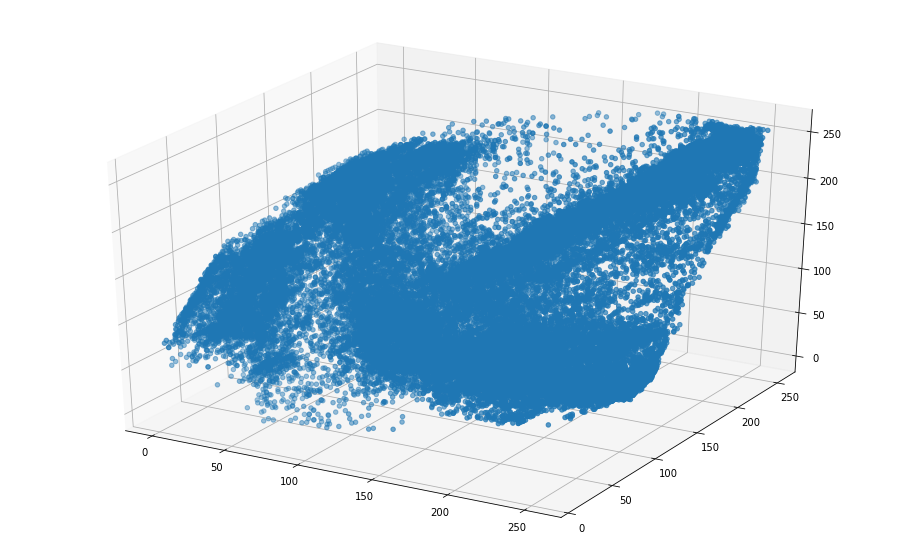

In [62]:
fig = plt.figure(figsize = [16,10])
ax = plt.axes(projection = '3d')

ax.scatter3D(xs = image[:, 0], ys = image[:, 1], zs = image[:, 2])

In [58]:
help(ax.scatter3D)

Help on method scatter in module mpl_toolkits.mplot3d.axes3d:

scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a scatter plot.
    
    Parameters
    ----------
    xs, ys : array-like
         The data positions.
    zs : float or array-like, optional, default: 0
        The z-positions. Either an array of the same length as *xs* and
        *ys* or a single value to place all points in the same plane.
    zdir : {'x', 'y', 'z', '-x', '-y', '-z'}, optional, default: 'z'
        The axis direction for the *zs*. This is useful when plotting 2D
        data on a 3D Axes. The data must be passed as *xs*, *ys*. Setting
        *zdir* to 'y' then plots the data to the x-z-plane.
    
        See also :doc:`/gallery/mplot3d/2dcollections3d`.
    
    s : scalar or array-like, optional, default: 20
        The marker size in points**2. Either an array of the same length
        as *xs* and *

**4**